In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

print(boston.shape)

(506, 14)


In [13]:
print(boston[['CHAS', 'RM', 'AGE', 'RAD', 'MEDV']].head())

   CHAS     RM   AGE  RAD  MEDV
0   0.0  6.575  65.2  1.0  24.0
1   0.0  6.421  78.9  2.0  21.6
2   0.0  7.185  61.1  2.0  34.7
3   0.0  6.998  45.8  3.0  33.4
4   0.0  7.147  54.2  3.0  36.2


In [14]:
print(boston.describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.59   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.65   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00   506.00  506.00  506.00  506.00  
mean   408.24    18.46  356.67   12.65   22.53  
std    168.54     2.16   91.29    7.14    9.20  
min    187.00    12.60    0.32    1.73    5.00  
25%    279.00    17.40  3

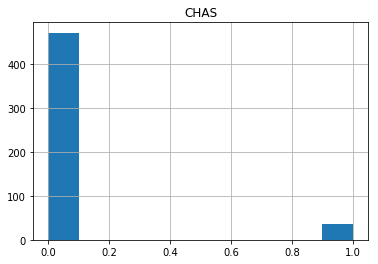

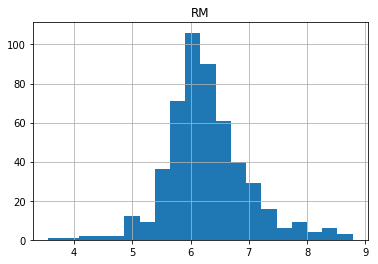

In [15]:
boston.hist(column = 'CHAS')
boston.hist(column = 'RM', bins=20)
plt.show()

In [16]:
#Correlation
corr_matrix = boston.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.40 -0.06  0.42 -0.22  0.35 -0.38  0.62  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.40 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.62 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.38  0.18  -0.36  

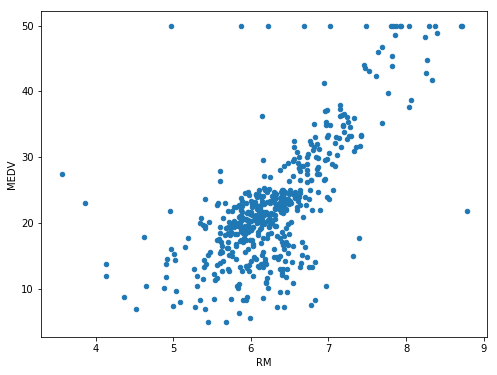

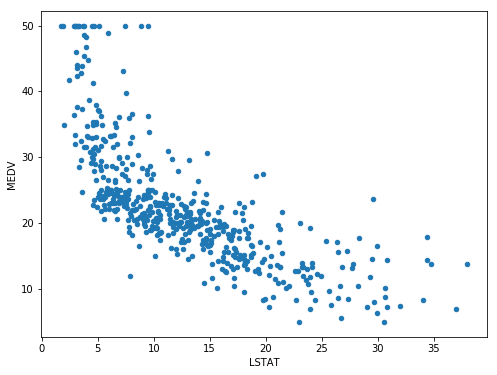

In [17]:
#Data Preparation- Feature selection
boston.plot(kind= 'scatter', x = 'RM', y = 'MEDV', figsize=(8,6))
boston.plot(kind= 'scatter', x = 'LSTAT', y = 'MEDV', figsize=(8,6))
plt.show()

In [18]:
X = boston[['RM']]
Y = boston['MEDV']

In [19]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 1)
(152, 1)
(354,)
(152,)


In [20]:
#Parameter Estimates
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.intercept_.round(2))
print(model.coef_.round(2))

-30.57
[ 8.46]


In [34]:
#Prediction
import numpy as np
new_RM = np.array([6.5]).reshape(-1,1)
print(model.predict(new_RM))

y_test_predicted = model.predict(X_test)
print(y_test_predicted.shape)

[ 24.42606323]
(152,)


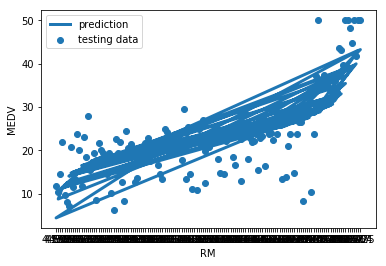

In [33]:
#Evaluating the model #Residuals
plt.scatter(X_test, Y_test, label = 'testing data')
plt.plot(X_test, y_test_predicted, label = 'prediction', linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

(152, 1)
(152,)


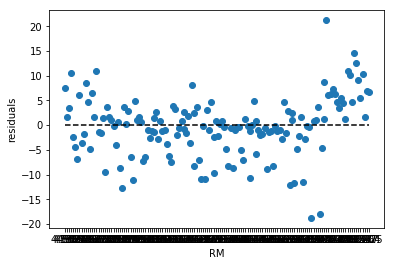

In [38]:
residuals = Y_test - y_test_predicted
print(X_test.shape)
print(residuals.shape)
plt.scatter(X_test, residuals)
plt.hlines(y=0, xmin = X_test.min(), xmax = X_test.max(), linestyle= '--')
#plt.xlim((4,9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.show()

In [39]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, y_test_predicted))

36.5172147308


In [40]:
#R-squared
print(model.score(X_test, Y_test))

0.601577447155


In [41]:
#Multivariate Linear Regression
X2 = boston[['RM', 'LSTAT']]
Y = boston['MEDV']
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state=1)

model2 = LinearRegression()

print(model2.fit(X2_train, Y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [42]:
print(model2.intercept_.round(2))
print(model2.coef_.round(2))

5.32
[ 4.13 -0.68]


In [43]:
y_test_predicted2 = model2.predict(X2_test)
print(y_test_predicted2[:10])

[ 28.478341    28.08411889  17.46168887  24.08502818  20.53939027
  24.07720618  29.49226779  21.53814087  17.73198767  25.82822684]


In [44]:
print((mean_squared_error(Y_test, y_test_predicted2)).round(2))

28.93
